Initial Analysis
----------------
This notebook contains some initial analysis on the articles that currently exist within Axelbib.

In [1]:
import requests
import pandas as pd
import collections
import json
from pandas.io.json import json_normalize

In [2]:
from password import password

Getting the data
----------------
For speed reasons we do not want to ping Axelbib repetitive. Thus this section will be perform when needed
and it pulls all the articles from Axelbib and spits back a json file.

In [3]:
df = []
req = requests.get('http://127.0.0.1:8000/article/', auth=("nikoleta", password))
results_of_req = req.json()['results']
df = pd.io.json.json_normalize(results_of_req)

ConnectionError: HTTPConnectionPool(host='127.0.0.1', port=8000): Max retries exceeded with url: /article/ (Caused by NewConnectionError('<requests.packages.urllib3.connection.HTTPConnection object at 0x7f1b5c140b00>: Failed to establish a new connection: [Errno 111] Connection refused',))

In [99]:
for page in range(101):
    req = requests.get('http://127.0.0.1:8000/article/?page={}'.format(page+2), auth=("nikoleta", password))
    results_of_req = req.json()['results'] 
    df = df.append(pd.io.json.json_normalize(results_of_req))

In [100]:
output = df.reset_index().to_json('data.json')

# Getting the data for Plos

In [3]:
df_plos = []
req = requests.get('http://127.0.0.1:8000/article/', auth=("nightwing", password))
results_of_req = req.json()['results']
df_plos = pd.io.json.json_normalize(results_of_req)

In [4]:
for page in range(8):
    req = requests.get('http://127.0.0.1:8000/article/?page={}'.format(page+2), auth=("nightwing", password))
    results_of_req = req.json()['results'] 
    df_plos = df_plos.append(pd.io.json.json_normalize(results_of_req))

In [10]:
output = df_plos.reset_index().to_json('plos_data.json')

Reading in the data
-------------------
This part is for reading in the json file at any given point.

In [277]:
df = pd.read_json('data.json', orient='column') # see index 
df =  df.sort_index()

In [278]:
df.describe()

,date.papers_on_specific_year,date.year,index
count,1015.0,1015.000000,1015.000000
mean,1.0,2007.097537,4.487685
std,0.0,63.519083,2.873671
min,1.0,0.000000,0.000000
25%,1.0,2007.000000,2.000000
50%,1.0,2010.000000,4.000000
75%,1.0,2013.000000,7.000000
max,1.0,2016.000000,9.000000


In [249]:
df_plos = pd.read_json('plos_data.json', orient='column') # see index 
df_plos =  df_plos.sort_index()

In [250]:
df_plos.describe()

,date.papers_on_specific_year,date.year,index,score
count,82.0,82.000000,82.000000,82.000000
mean,1.0,2012.451220,4.402439,1.602187
std,0.0,2.103216,2.922285,0.952403
min,1.0,2006.000000,0.000000,0.646452
25%,1.0,2011.000000,2.000000,1.023479
50%,1.0,2013.000000,4.000000,1.126165
75%,1.0,2014.000000,7.000000,1.700030
max,1.0,2016.000000,9.000000,4.429528


# Cleaning the data

In [279]:
df.head(1)

,abstract,author,date.papers_on_specific_year,date.url,date.year,index,journal,key,key_word,labels,list_strategies,pages,provenance,read,score,title,unique_key
0,Evolution of cooperative strategies was examin...,"[{'papers_on_this_db': 1, 'name': 'Hisao Ishib...",1,http://127.0.0.1:8000/keyword/2309/,2013,0,2013 Fifth International Conference on Computa...,Ishibuchi2013,"[{'key_word': 'Lattices'}, {'key_word': 'Noise...",[],[],32-37,IEEE,False,none,Evolution of cooperative strategies for iterat...,e6eba18255d1131359ca99b24cb1bb58


In [280]:
list_author = [[]]
for _, article in df['author'].items():
    list_author.append([])
    for authors in article:
        list_author[-1].append(authors['name'])

In [281]:
df['name'] = list_author[1:]

In [282]:
list_keywords = [[]]
for _, article in df['key_word'].items():
    list_keywords.append([])
    for word in article:
        list_keywords[-1].append(word['key_word'].upper())
len(list_keywords)

1016

In [283]:
df['key_words'] = list_keywords[1:]

In [284]:
df = df.drop(['author', 'date.papers_on_specific_year', 'date.url', 'key_word', 'labels', 'list_strategies'], 1)

In [285]:
df.columns

Index(['abstract', 'date.year', 'index', 'journal', 'key', 'pages',
       'provenance', 'read', 'score', 'title', 'unique_key', 'name',
       'key_words'],
      dtype='object')

In [286]:
df.head(1)

,abstract,date.year,index,journal,key,pages,provenance,read,score,title,unique_key,name,key_words
0,Evolution of cooperative strategies was examin...,2013,0,2013 Fifth International Conference on Computa...,Ishibuchi2013,32-37,IEEE,False,none,Evolution of cooperative strategies for iterat...,e6eba18255d1131359ca99b24cb1bb58,"[Hisao Ishibuchi, Koichiro Hoshino, Takahiko S...","[LATTICES, NOISE, GAME THEORY, ITERATIVE METHO..."


In [288]:
df.join(df.name.apply(lambda x: ))

NameError: name 'Series' is not defined

Initial Analysis & Plots
------------------------

In [259]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


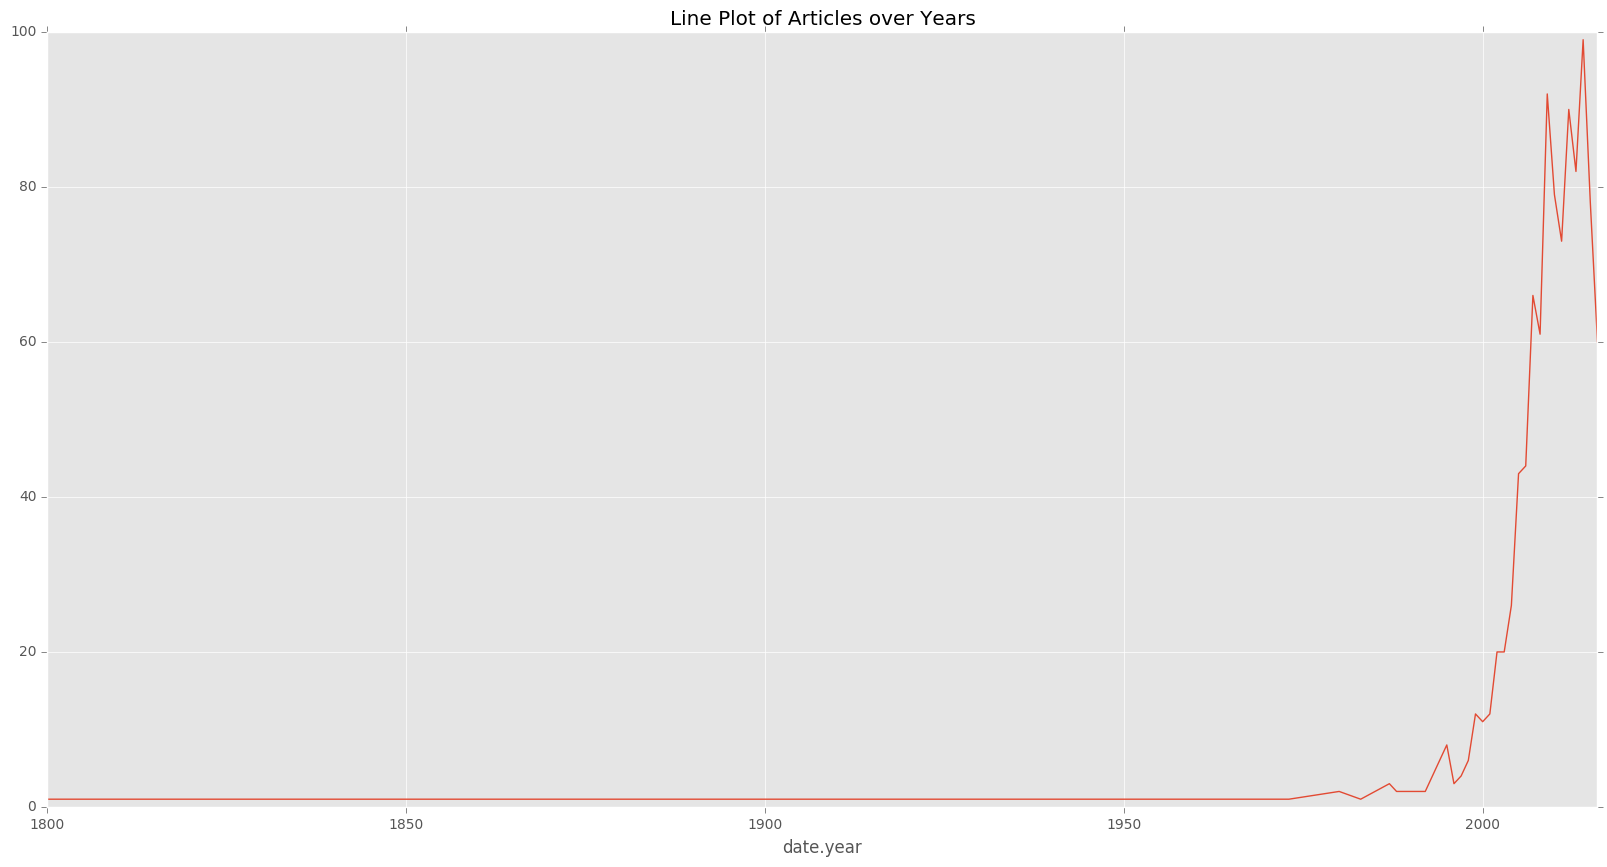

In [260]:
num_articles_per_year = df.groupby('date.year').size()
fig = figure(figsize=(20, 10))
plt.title("Line Plot of Articles over Years")
num_articles_per_year.plot(xlim=1800)

(1800, 2020)

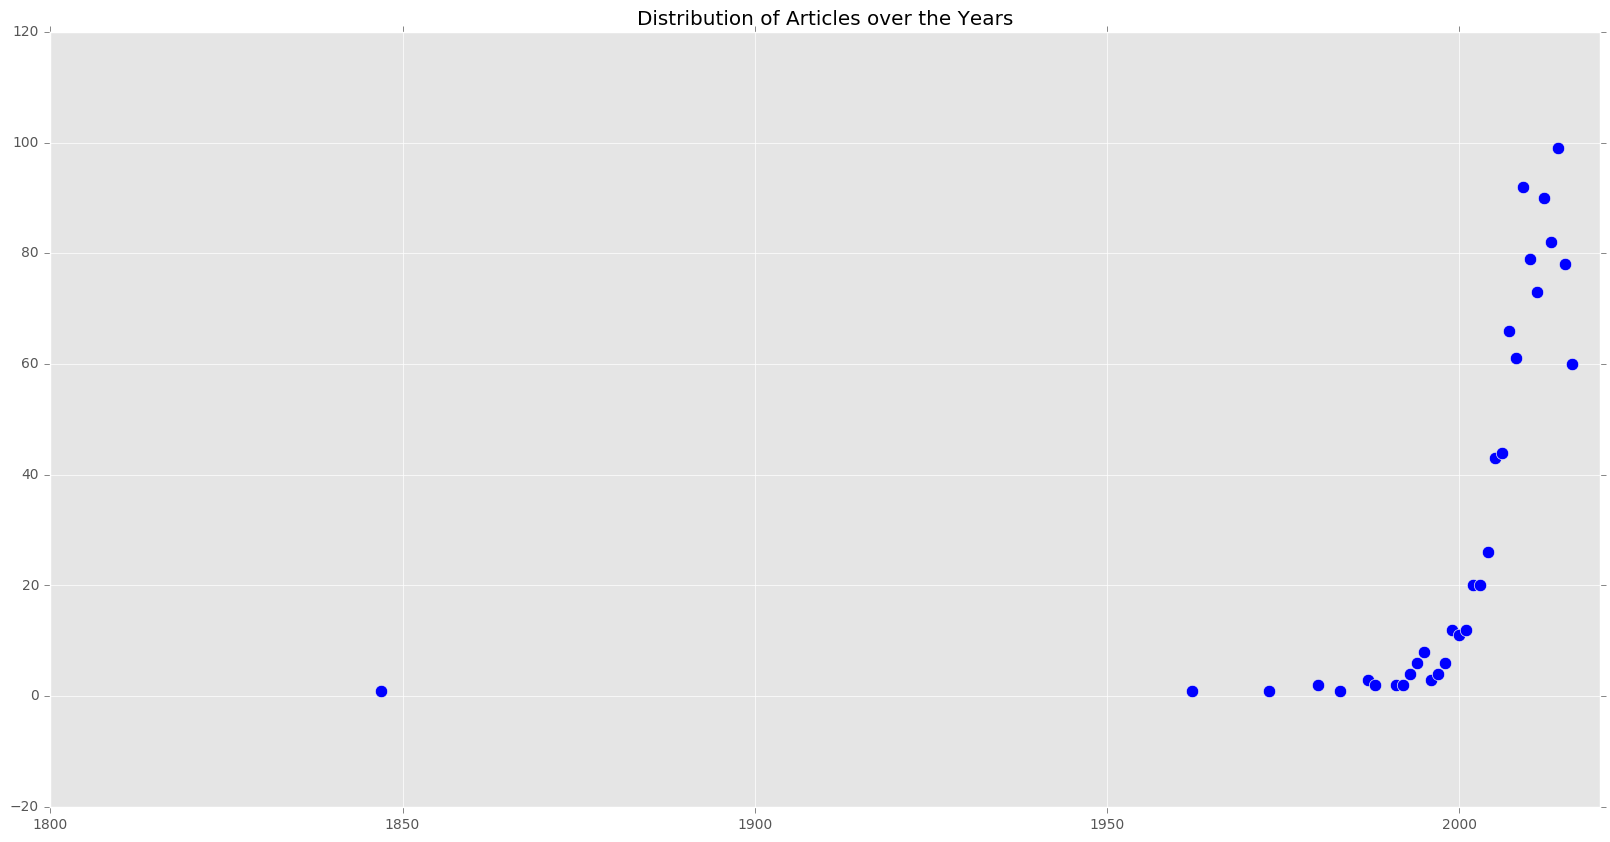

In [261]:
import pylab

plt.figure();
fig = figure(figsize=(20, 10))
plt.title("Distribution of Articles over the Years")
pylab.scatter(num_articles_per_year.index, num_articles_per_year, s=80)
plt.xlim(1800, 2020)

In [262]:
word = 'zero determinant'
index = [word in w for w in df.abstract]
df[index]

,abstract,date.year,index,journal,key,pages,provenance,read,score,title,unique_key,name,key_words
329,Iterated games are a fundamental component of ...,2012,9,arXiv,Hilbe2012,,arXiv,False,none,The Evolution of Extortion in Iterated Prisone...,f742938a3ccce3a6c5191cee9bea03ef,"[Christian Hilbe, Karl Sigmund, Martin A. Nowak]",[NONE]
438,We define a new strategy for population games ...,2014,8,PLoS One. 2015; 10(3): e012062,Lee2014,,arXiv,False,none,The Art of War: Beyond Memory-one Strategies i...,7e64918889fd1a9be63d428604057056,"[Christopher Lee, Dashiell Fryer, Marc Harper]",[NONE]
859,<p>Nature Communications 4 : Article number: 2...,2014,9,Nature Publishing Group,Hintze2014,,Nature,False,none,Corrigendum: Evolutionary instability of zero-...,7ff83d342fb5a25010b4b33a4ca8019d,[Arend Hintze],[NONE]
865,We show that the minimal number of colors for ...,2015,5,arXiv,Ichihara2015,,arXiv,False,none,A lower bound on minimal number of colors for ...,2999f6bcdec41ba92adf8d46d959a441,"[Eri Matsudo, Kazuhiro Ichihara]",[NONE]
872,We investigate Linear and Inverse seesaw mecha...,2015,2,"Phys.\ Lett.\ B {\bf 759}, 206 (2016)",Sinha2015,,arXiv,False,none,Maximal Zero Textures in Linear and Inverse Se...,aee64b6001d10f789e665619b6bc56df,"[Ambar Ghosal, Rome Samanta, Roopam Sinha]",[NONE]


In [263]:
index = [k[0] != 'NONE' for k in df.key_words]

In [264]:
perc_with_key = 100*len(df[index])/len(df)
perc_with_key

32.118226600985224

In [265]:
keywords = pd.concat([pd.DataFrame(v, index=np.repeat(k,len(v))) 
            for k,v in df.key_words.to_dict().items()]) 
keywords.columns = ['keywords']

In [266]:
perce = keywords.groupby('keywords').size().divide(sum(keywords['keywords'].notnull()))*100
perce #[perce >0.5] #counts

keywords
ACCELERATION                     0.095080
ACCIDENTS                        0.047540
ACCURACY                         0.023770
ACOUSTIC SIGNAL PROCESSING       0.047540
AD HOC NETWORKS                  0.166389
ADAPTATION MODEL                 0.023770
ADAPTATION MODELS                0.190159
ADAPTIVE CONTROL                 0.023770
ADAPTIVE SYSTEMS                 0.213929
ADMITTANCE                       0.023770
AERODYNAMICS                     0.023770
AFRICA                           0.023770
AGEING                           0.023770
AGGREGATES                       0.047540
AGING                            0.023770
AGRICULTURAL PRODUCTS            0.023770
AGRICULTURE                      0.023770
AIR TRAFFIC CONTROL              0.023770
ALGEBRA                          0.071310
ALGORITHM DESIGN AND ANALYSIS    0.285239
AMORPHOUS MATERIALS              0.023770
ANALOG CIRCUITS                  0.023770
ANALOGUE INTEGRATED CIRCUITS     0.023770
ANALYTICAL MODELS        

In [267]:
keywords[keywords.keywords == 'THIN FILM TRANSISTORS']

,keywords
12,THIN FILM TRANSISTORS
28,THIN FILM TRANSISTORS
29,THIN FILM TRANSISTORS
38,THIN FILM TRANSISTORS
45,THIN FILM TRANSISTORS
48,THIN FILM TRANSISTORS
51,THIN FILM TRANSISTORS
67,THIN FILM TRANSISTORS
71,THIN FILM TRANSISTORS
76,THIN FILM TRANSISTORS


In [268]:
df[df.index ==12]

,abstract,date.year,index,journal,key,pages,provenance,read,score,title,unique_key,name,key_words
12,Domination is a concept in Game Theory which h...,2011,2,2011 24th Canadian Conference on Electrical an...,Brown2011,001125-001128,IEEE,False,none,Domination in Iterated Prisoner's Dilemma,de72b3cb816c44cf0970f3147a20d596,"[Daniel A. Ashlock, Joseph Alexander Brown]","[BIOLOGY, EVOLUTIONARY COMPUTATION, GAME THEOR..."


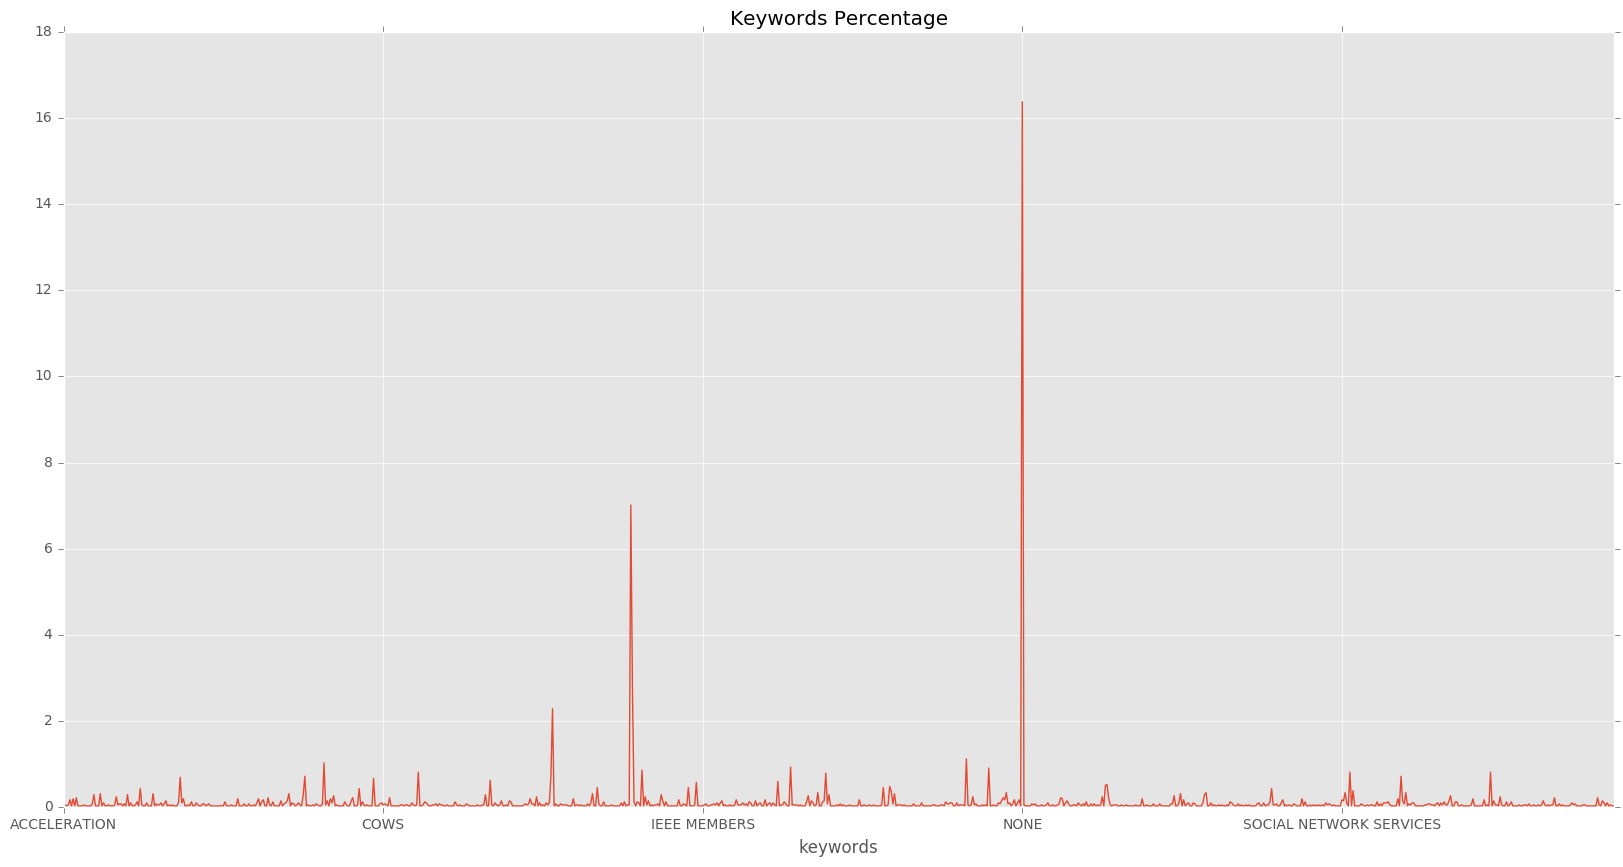

In [269]:
plt.figure();
fig = figure(figsize=(20, 10))
plt.title("Keywords Percentage")
perce.plot()

In [270]:
dummy = pd.get_dummies(keywords.keywords)
dummy

,ACCELERATION,ACCIDENTS,ACCURACY,ACOUSTIC SIGNAL PROCESSING,AD HOC NETWORKS,ADAPTATION MODEL,ADAPTATION MODELS,ADAPTIVE CONTROL,ADAPTIVE SYSTEMS,ADMITTANCE,...,WIRELESS LAN,WIRELESS MESH NETWORKS,WIRELESS NETWORKS,WIRELESS SENSOR NETWORKS,WIRES,WORKING ENVIRONMENT NOISE,WORKSTATION CLUSTERS,YARN,YTTRIUM,ZOOLOGY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [271]:
authors = pd.concat([pd.DataFrame(v, index=np.repeat(k,len(v))) 
            for k,v in df.name.to_dict().items()]) 

In [272]:
df.groupby('date.year').count()

,abstract,index,journal,key,pages,provenance,read,score,title,unique_key,name,key_words
date.year,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,1
1847,1,1,1,1,1,1,1,1,1,1,1,1
1962,1,1,1,1,1,1,1,1,1,1,1,1
1973,1,1,1,1,1,1,1,1,1,1,1,1
1980,2,2,2,2,2,2,2,2,2,2,2,2
1983,1,1,1,1,1,1,1,1,1,1,1,1
1987,3,3,3,3,3,3,3,3,3,3,3,3
1988,2,2,2,2,2,2,2,2,2,2,2,2
1991,2,2,2,2,2,2,2,2,2,2,2,2


In [274]:
number_of_authors = [len(au) for au in df.name if au[0] is None] 
number_of_authors

[]

In [ ]:
authors_plot.plot(kind='scatter', x = 'Year', y = 'Number_of_Articles', c='Number_of_Authors', s=50, figsize=(20, 10),
          title='Number of Articles per Year and Number of Authors')

In [ ]:
authors_plot.plot(kind='scatter', x = 'Year', y = 'Number_of_Articles', s=authors_plot['Number_of_Authors']*5, figsize=(20, 10),
          title='Number of Articles per Year and Number of Authors')

# PLOS

# Fix data

In [205]:
list_author = [[]]
for _, article in df_plos['author'].items():
    list_author.append([])
    for authors in article:
        list_author[-1].append(authors['name'])

In [206]:
list_keywords = [[]]
for _, article in df_plos['key_word'].items():
    list_keywords.append([])
    for word in article:
        list_keywords[-1].append(word['key_word'].upper())
len(list_keywords)

83

In [207]:
df_plos['name'], df_plos['keywords'] = list_author[1:], list_keywords[1:]

In [209]:
df_plos = df_plos.drop(['author', 'date.papers_on_specific_year', 'date.url', 'key_word', 'labels', 'list_strategies'], 1)

In [212]:
df_plos.sort('score').tail(5)

/home/nightwing/anaconda3/envs/axelbib/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,abstract,date.year,index,journal,key,pages,provenance,read,score,title,unique_key,name,keywords
36,"Recently, the authors proposed a quantum priso...",2015,6,PLOS ONE,Li2015,,PLOS,False,3.477216,Emergence of Super Cooperation of Prisoner’s D...,fe2221f5855380573ecf17b50d5c3940,"[Angsheng Li, Xi Yong]",[NONE]
35,Relational diversity can be characterized by h...,2014,5,PLoS ONE,Xu2014,,PLOS,False,3.641492,Relational Diversity Promotes Cooperation in P...,1fb8c7938d242eedee6798df6d17cc53,"[Bo Xu, Jianwei Wang, Miao Li, Ruipu Deng]",[NONE]
6,To be the fittest is central to proliferation ...,2010,6,PLoS ONE,Perc2010,,PLOS,False,3.725801,Heterogeneous Aspirations Promote Cooperation ...,c8ccc08b305a54baccdbf76086ddf28f,"[Matjaž Perc, Zhen Wang]",[NONE]
5,We study the evolution of cooperation in the s...,2011,5,PLoS ONE,Zhang2011,,PLOS,False,3.821370,Evolution of Interactions and Cooperation in t...,e2c54a8e729a6910e2ab11c0835aacc0,"[Chunyan Zhang, Guangming Xie, Jianlei Zhang, ...",[NONE]
4,"Cooperative behavior, where one individual inc...",2013,4,PLoS ONE,Zagorsky2013,,PLOS,False,4.429528,Forgiver Triumphs in Alternating Prisoner's Di...,f00732f90a8579ced46e5810434e871f,"[Benjamin M. Zagorsky, Johannes G. Reiter, Kri...",[NONE]


/home/nightwing/anaconda3/envs/axelbib/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


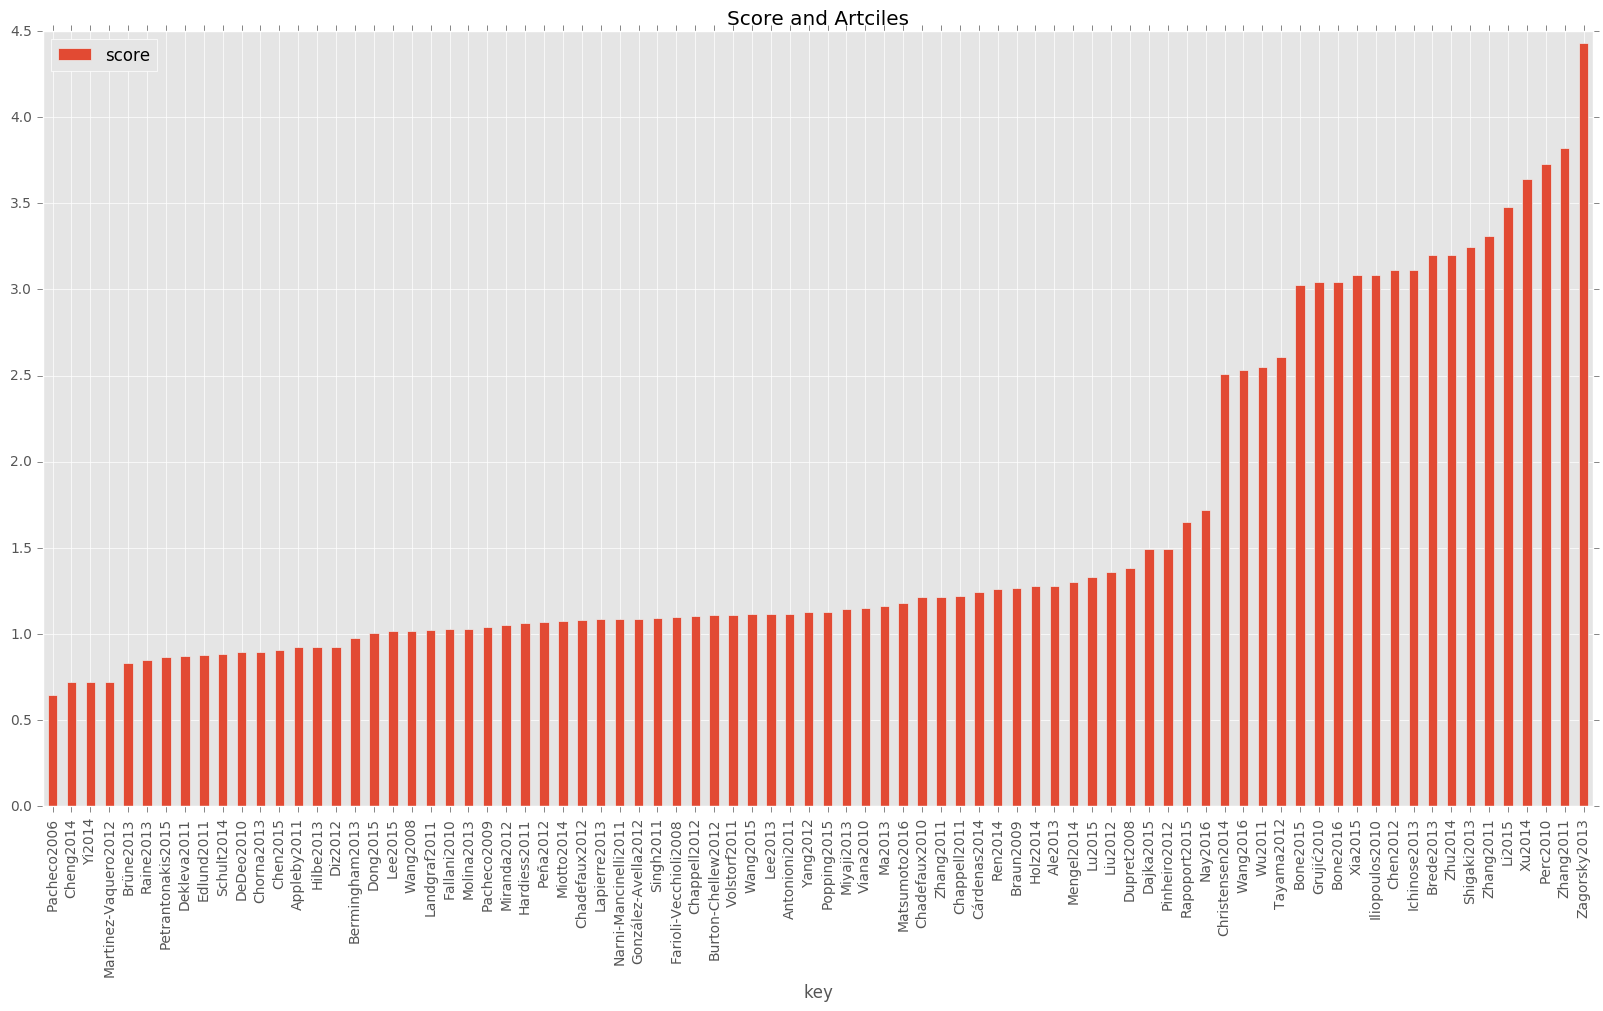

In [221]:
df_plos.sort('score').plot(kind='bar', x='key', y='score', figsize=(20,10), title='Score and Artciles')

# Plos data vs Data

In [229]:
values  = df.unique_key.isin(df_plos.unique_key)
values[values == True]

912    True
913    True
914    True
915    True
Name: unique_key, dtype: bool

In [231]:
values  = df.key.isin(df_plos.key)
values[values == True]

241    True
263    True
327    True
344    True
346    True
348    True
389    True
393    True
468    True
508    True
540    True
665    True
830    True
912    True
913    True
914    True
915    True
Name: key, dtype: bool

In [232]:
values  = df.title.isin(df_plos.title)
values[values == True]

241    True
438    True
912    True
913    True
914    True
915    True
Name: title, dtype: bool